## Keras: A high level neural network library

In this exercise we will revisit classification using simple neural networks. To do so we will use Keras, a popular neural network package. Keras is a high level library that allows rapid prototyping of neural networks due to its precompiled layers, just as Scikit-learn contains a number of prebuilt classifiers.


## Keras

Detailed instructions can be found at https://keras.io.


To start the demo, we have a 2D dataset so we can visualize what the network is doing.

Neural networks are so popular now due to their ability to quickly learn nonlinear boundaries. So, we have an example that would be impossible for a linear classifier and demonstrate how a neural network can be used to solve this. As you can see, in the dataset below there is no straight line that you can draw that perfectly separates the red and blue classes

In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('utils.py','wb').write(src)
import utils

Saving utils.py to utils.py


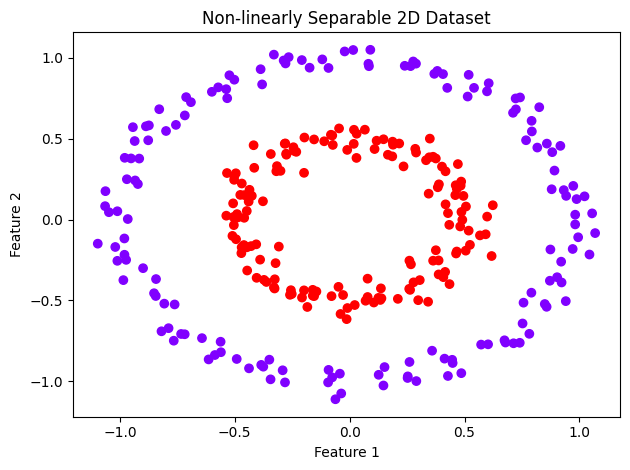

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import numpy as np

# Generate a non-linearly separable dataset
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Function to get consistent colors for plotting
def get_colors(y):
    # Map unique labels to colors
    unique_labels = np.unique(y)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    color_map = {label: color for label, color in zip(unique_labels, colors)}
    return [color_map[label] for label in y]

cmap = get_colors(y)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=cmap)
plt.title("Non-linearly Separable 2D Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

Let's split it into a training and testing set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

We will build a Perceptron using Keras as an example-- Recall that a perceptron is a 0 hidden layer neural network with a single output unit. In Keras terms, it's a single Dense layer with 1 unit.

We will build this perceptron with a sigmoidal output (so it outputs a probability of class 1) and the binary_crossentropy loss function (which corresponds to sigmoid).

In [ ]:
# Relevant imports
from keras.models import Sequential
# Keras refers to an architecture in which the outputs of
# one layer are the inputs to the next as "Sequential"
from keras.layers import Dense
# Everything we've talked about in class so far is referred to in
# Keras as a "dense" connection between layers, where every input
# unit connects to a unit in the next layer
from tensorflow.keras.optimizers import SGD
# SGD is the learning algorithm we will use

# Exercise 1:

Q1. Let's first create neural network with 1 layer

To add a layer to the architecture, you would simply use .add(LAYER).

Each "input_dim" of each layer should be the number units in the previous layer (in this case the input), and the number of "units" should be the number of outputs of the layer (in this case it will be 1).

In [ ]:
### YOUR CODE HERE ###



Now we specify how to optimize the neural network. We mentioned gradient descent and stochastic gradient descent in class. Let's use the latter here and compile the model. We also specify the loss function as "binary_crossentropy".

In [ ]:
sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
perceptron.compile(loss="binary_crossentropy", optimizer=sgd)


Q2. Now we train the built perceptron with appropriate epochs and batch_size.

In [ ]:
### YOUR CODE HERE ###


Q3. Compute accuracy by implementing your own function.

In [ ]:
y_preds = perceptron.predict(X_test)

In [ ]:
### Build your own function to calculate accuracy###
def accuracy(y, y_preds):

    return

In [ ]:
print(f'The accuracy is: {accuracy(y_test, y_preds)}')

In [ ]:
from utils import visualize_2d_classification
f, ax = visualize_2d_classification(perceptron, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(perceptron, X_test, y_test)
ax.set_ylabel("Test")

Recall that a perceptron is nothing more than a linear classifier, which is trying to separate our data using a line. It turns out that the introduction of hidden layers allows us to draw "lines" in higher dimensions, which, when mapped back into our original 2d space,  may look nonlinear.

# Exercise 2:

For this exercise, use Keras to create a 2-layer neural network by completing build_one_output_model(). We will then add one hidden layer of 2 units and an output layer of 1 unit (corresponding to our classes- sometimes referred to as a "readout" layer).

The model has already been initialized and the optimizer and loss function have been defined for you.

For your intermediate layers, use "relu" as the activation function, and "sigmoid" (as the demo above) for your output layer.

In [ ]:
# Keras uses the Sequential model for linear stacking of layers.
# That is, creating a neural network is as easy as (later)
# defining the layers!
from keras.models import Sequential
# Everything we've talked about in class so far is referred to in
# Keras as a "dense" connection between layers, where every input
# unit connects to a unit in the next layer

from keras.layers import Dense
# SGD is the learning algorithm we will use
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Q1. Create a 2 layer neural network by completing build_one_output_model().

In [ ]:
def build_one_output_model():
    model = Sequential()

    ### YOUR CODE HERE ###
    # Add a input hidden layer with 2 units


    # Add a final output layer with 1 unit



    # Specify SGD optimizer with appropriate values in learning_rate, decay and momentum.


    # compile the model with "binary_crossentropy" loss and SGD optimizer.


    return model


In [ ]:
model = build_one_output_model()

Q2. Fit your model by training set with appropriate epochs and batch_size.

In [ ]:
### YOUR CODE HERE ###


Q3. Compute accuracy by using your own function.

In [ ]:
### YOUR CODE HERE ###


In [ ]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")


It is actually quite rare for a classification neural network to have a single output unit as we've implemented above. Usually we have a $k$ unit output layer, where $k$ is the number of classes. This is typically done because when combined with the "softmax" activation function , the activity of each unit corresponds with the probability of that class. This allows us to easily extend to multiclass classification.

Now we will still work with two units, but map them to two output units rather than 1. class 0 will be [1, 0], and class 1 will be [0, 1]. This operation is referred to as "one hot encoding".

In [ ]:
# Before we can fit the network, we need to one-hot vectorize our response.
# There is a keras method for that.
from tensorflow.keras.utils import to_categorical

y_train_vectorized = to_categorical(y_train)

In [ ]:
print("Label | One-hot")
for i in range(10):
    print("{} | {}".format(y_train[i], y_train_vectorized[i]))

Label | One-hot
1 | [0. 1.]
1 | [0. 1.]
1 | [0. 1.]
1 | [0. 1.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]
1 | [0. 1.]
0 | [1. 0.]
0 | [1. 0.]


The one hot encoded vectors will serve as future labels for our models.

# Exercise 3:

Q1.Implement build_classification_model() that returns a sequential model that takes an input of size 2, passes it to a hidden layer of size 10, then a hidden layer of size 5, then a readout layer of size 2.


As before, use the "relu" activation function for hidden layers, but since we have multiple output units, use the "softmax" activation for the final layer.

We use SGD optimizer and "categorical_crossentropy" loss function to compile the model.

In [ ]:
def build_classification_model():
    model = Sequential()

    ### YOUR CODE HERE ###




    return model

In [ ]:
model = build_classification_model()

Q2. Fit your model by training set

In [ ]:
### YOUR CODE HERE ###


Q3. Compute accuracy by using your own function

In [ ]:
# And visualize how your model did


# Exercise 4:
### Short answer-questions
\lb remove this

Q1. The learning rate is an important parameter for gradient descent. Please briefly describe a possible issue if we choose too high a learning rate for full batch gradient descent (GD). Also, please briefly describe a possible issue if we choose too high a learning
rate for stochastic gradient descent (SGD), but is not a problem in the full batch setting.

Ans-

Q2. Please give an example in the data augmentation methods that is helpful for classifying images of dogs and cats, but not for classifying handwritten digit.

Ans-

Q3. Suppose we have the following two neural networks containing fully-connected layers only.
<div>
<img src="https://ucla.box.com/shared/static/kgninjcbqpztz680q47emsluvituw4ga.jpg" width="300"/>
</div>
Please give one advantage of A over B, and one advantage of B over A.

Ans-


# Exercise 5:

Now let's revisit the classification problem (Dataset 1) in Homework 2. Build a neural network to predict the output in the default payment dataset. The architecture choice is up to you, but you are required to use Dense layers and dropout layers only.

"CreditDefault_training.csv" has 3985 records.

"CreditDefault_Xtest.csv" contains contains 1000 rows and 14 columns. This is the test set which only contains the features.

Q1. Read the data<br/>
- Apply standardization to continuous values<br/>
- Convert categorical variables and the target "default.payment.next.month" into one-hot encodings. <br>
- Split data into train and validation set<br/>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
### YOUR CODE HERE ###


In [ ]:
# Split data into X (features) and y (target)
# Please make sure y is in a one-hot representation
# WRITE CODE HERE


In [ ]:
# Split data into training and validation set (the code has been provided)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Print out the shape of X_train


Q2. Build a neural network to predict the output in the "CreditDefault_training.csv". The architecture choice is up to you, but you are required to use Dense layers and dropout layers only.

You can try different number of layers, different number of units in layers and experiment with hyperparameters.

To include regularization, you can include a dropout layer after a hidden layer. In dropout layer, you can randomly set a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

Please use 'relu' activation function for all intermediate layers.

Please build your model in the build_final_model() function

In [ ]:
def build_final_model():
    model = Sequential()
    ### YOUR CODE HERE ###

    # First add fully-connected (Dense) hidden layers with appropriate input dimension


    # Drop out layer


    # Continues the process


    # Finally, add a readout layer

    ######################
    sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])


    return model

In [ ]:
model = build_final_model()

Q3. Fit the model by training set with epochs=100, batch_size=32

In [ ]:
### YOUR CODE HERE ###


Q4. Obtain predictions on validation set and print accuracy, precision & recall and F1 score.

F1 = 2 * (precision * recall) / (precision + recall)

Q5. Plot the ROC curve by giving appropriate names for title and axes.

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.
### WRITE CODE HERE


Is the accurancy value impressive for this dataset? Please explain based on the structure of this dataset.

For these five metrics (accuracy, precision, recall, F1 score and AUC), please explain their connections and differences. For our dataset, which metrics should we focus more on?

Ans-


#### Tuning hyperparameters using cross-validation:<br/>
Cross-validation in neural networks is computationally expensive. So we will perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function.

Here, we will use KerasClassifier class, which act as a wrapper of scikit-learn’s library in Keras comes as a handy tool for automating the tuning process.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

Q6. First we create a function to build neural network model with activation function and learning rate of SGD as parameters

In [ ]:
# Build create_model function with activation function and learning rate of SGD as parameters
def create_model(learning_rate, activation):

    # Create an SGD optimizer with its learning rate equal to the "learning_rate" parameter value of create_model
    opt = SGD(learning_rate= , decay=1e-7, momentum=.9)

    # Create your neural network model
    model = Sequential()
    # Please keep the same architecture as the NN model you have built above in order for comparison
    # Please use the activation given by the "activation" parameter value of create_model for all inner layers except for the final layer.
    # For the final output layer, choose an appropriate activation function by yourself.

    ### WRITE CODE HERE


    # Compile the model
    model.compile(optimizer = opt,
                  loss = 'categorical_crossentropy',
                  metrics=["accuracy"])
    return model

Create a model object using KerasClassifier from keras.wrappers.scikit_learn by passing the create_model function.

In [ ]:
model = KerasClassifier(build_fn = create_model,
                       verbose = 0)

Q7. Try the following hyperparameters:

- activation function: relu, tanh

- batch size: 16, 32 and 64

- epochs: 100, 200 and 500

- learning rate: 0.01, 0.001 and 0.0001

Use dictionary object to define the parameter search space.

In [ ]:
### WRITE CODE HERE


Next we perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function. We select the randomized search as it works faster than a grid search. Here, we will perform a 5-fold cross-validation search.

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html?highlight=randomizedsearchcv#sklearn.model_selection.RandomizedSearchCV for the use of RandomizedSearchCV.

In [ ]:
### WRITE CODE HERE
random_search = RandomizedSearchCV(estimator = ,
                                   param_distributions = ,
                                   cv = )


In [ ]:
random_search_results = random_search.fit(X_train, y_train) # it may take several hours.

Q8. Print the best model parameters

In [ ]:
### WRITE CODE HERE


Q9. Fit the model with the Best Parameter Set

In [ ]:
### WRITE CODE HERE


Q10. Obtain predictions on validation set and print accuracy, precision, recall and F1 score.

In [ ]:
### WRITE CODE HERE


Do you get a better accuracy/recall/precision/F1 score than the first NN model you have built in exercise 5? Explain.

Ans-

### Logistic Regression and Random Forest
In a real world scenario, you can try a number of algorithms for the same problem. Let us work with the same default payment dataset to produce Logistic Regression and Random Forest models.

Q11. Implement a function logistic_regression_model that returns a logistic regression model with the best paprameters. You will use GridSearchCV to find the best parameters. The parameters search space is up to you. If there is any ConvergenceWarning, increase the number of iterations.

In [ ]:
def logistic_regression_model(X_train, y_train):
    ### YOUR CODE HERE ###

    ######################
    return # Return a logistic model with the best parameters you found

Q12. Fit the model by training set, obtain predictions on validation set and compute accuracy, precision, recall and F1 score.

In [ ]:
# fit the model
# compute accuracy,precision,recall on validation set
### YOUR CODE HERE ###


Q13. Plot the ROC curve by giving appropriate names for title and axes.

In [ ]:
### WRITE CODE HERE


Q14. Implement a function random_forest_model that returns a random forest model with the best paprameters. You will apply GridSearchCV to find the best parameters. The parameter search space is up to you. (Please set the random state of RandomForestClassifier to be 26.)

In [ ]:
def random_forest_model(X_train, y_train):
    rf = RandomForestClassifier(random_state=26) # Please set the random state to be 26
    ### YOUR CODE HERE ###


    return # Return a logistic model with the best parameters you found and random_state=26

Q15. Fit the model by training set, obtain predictions on validation set and compute accuracy, precision, recall and F1 score.

In [ ]:
### WRITE CODE HERE

Q16. Plot the ROC curve by giving appropriate names for title and axes.

Q17: Which of the above 3 models (NN, Logistic function and random forest) worked best for you? Explain in details the reason for good/bad performance for each of the models?




Using the best of the above 3 models, obtain predictions for the test set.

In [ ]:
### YOUR CODE HERE ###
# y_pred =



---



### Individual student contribution